In [31]:
import numpy as np
import os
from visuals.visualization import Visualizer
from basics.scenarios import Scenarios
from STL.spec_check import Spec_checker;

In [32]:
System_configuration = "non-STL" # "STL" or "non-STL"
user_mode = "automatic" # "automatic" or "conversation"
scenario_name = "treasure_hunt" # "reach_avoid" or "treasure_hunt"
experiment_number = 3

In [33]:
# Open and read the numpy file
file_path = os.path.join(os.getcwd(), f'experiments/{System_configuration}/{user_mode}/{scenario_name}/{experiment_number}_waypoints.npy')
waypoints = np.load(file_path)

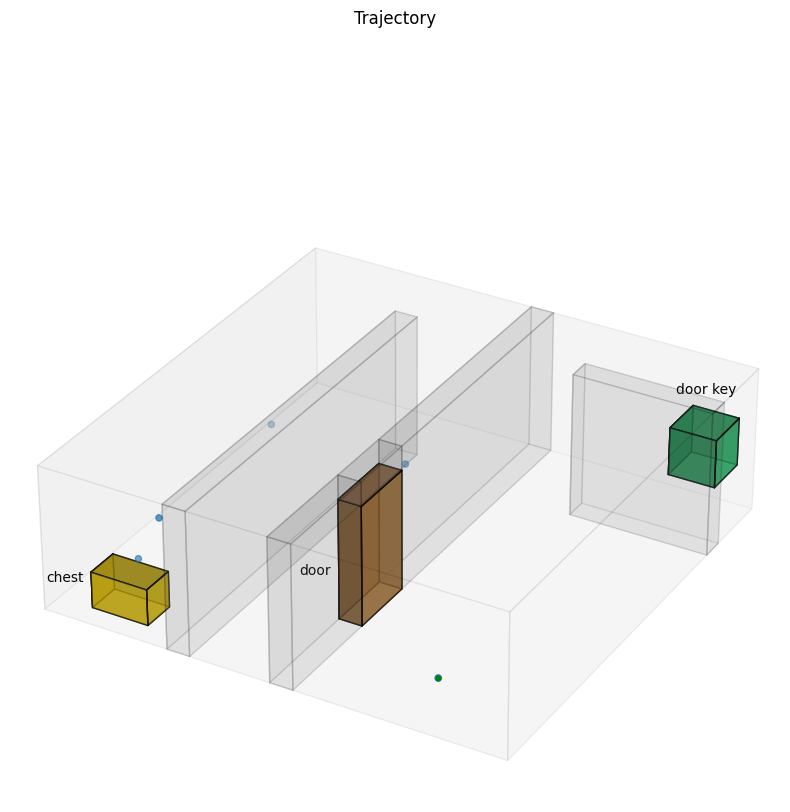

In [34]:
# visualize waypoints using visualization.py
scenario = Scenarios(scenario_name)    # Set up the scenario
visualizer = Visualizer(waypoints, scenario)
visualizer.visualize_trajectory();

In [35]:
def linearly_interpolate(waypoints, num_points):
    interpolated_waypoints = []
    for i in range(waypoints.shape[1]-1):
        start = waypoints[:,i]
        end = waypoints[:,i+1]
        x = np.linspace(start[0], end[0], num_points)
        y = np.linspace(start[1], end[1], num_points)
        z = np.linspace(start[2], end[2], num_points)
        interpolated_waypoints.extend(list(zip(x, y, z)))
    return np.array(interpolated_waypoints)

interpolated_waypoints = linearly_interpolate(waypoints, 10).T

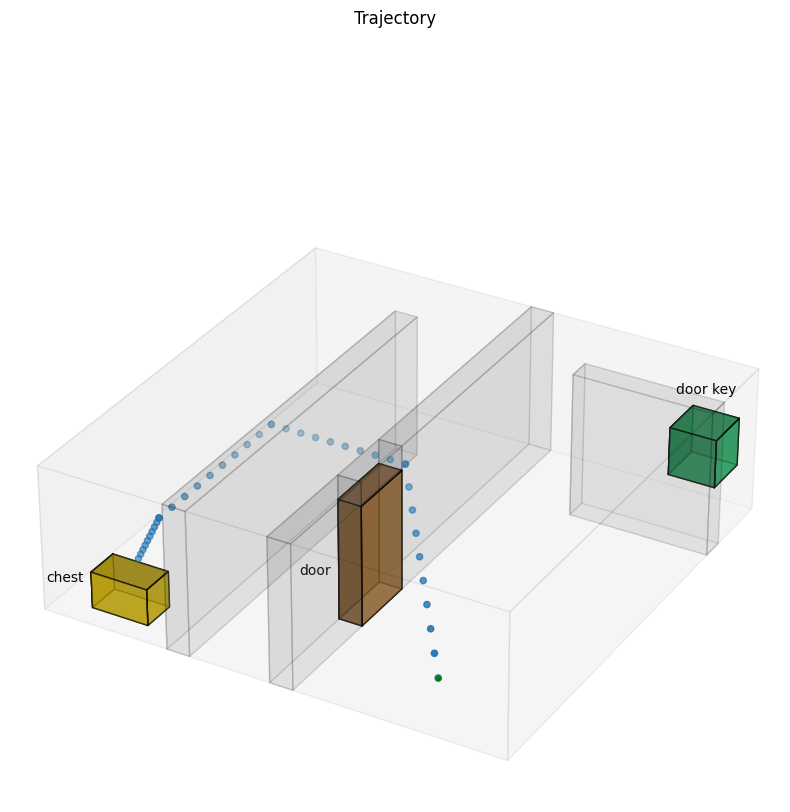

In [36]:
# visualize interpolated waypoints
visualizer = Visualizer(interpolated_waypoints, scenario)
visualizer.visualize_trajectory();

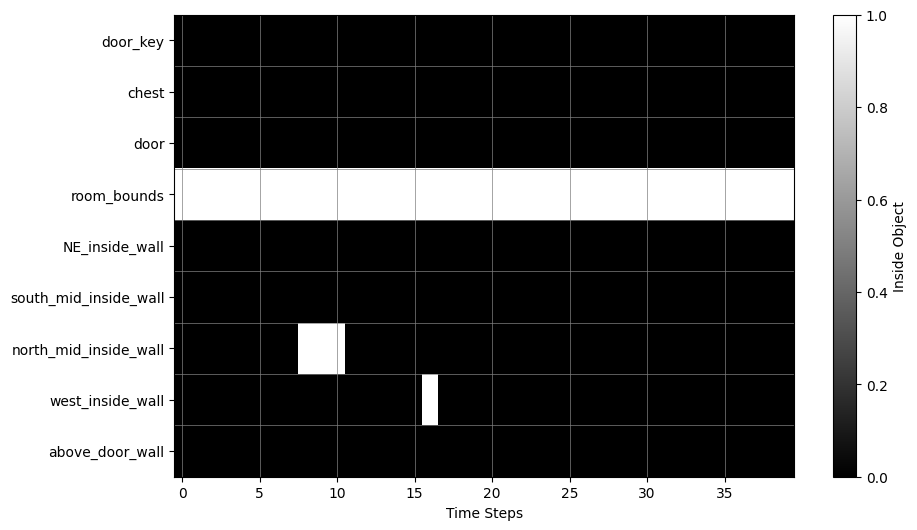

In [37]:
spec_checker = Spec_checker(scenario.objects, interpolated_waypoints, waypoints.shape[1], None)
inside_objects_array = spec_checker.get_inside_objects_array()
fig, ax = spec_checker.visualize_spec(inside_objects_array)

In [38]:
experiments_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
inside_objects_array_list = []
max_waypoints = 0
for experiment_number in experiments_list:
    file_path = os.path.join(os.getcwd(), f'experiments/{System_configuration}/{user_mode}/{scenario_name}/{experiment_number}_waypoints.npy')
    waypoints = np.load(file_path)
    interpolated_waypoints = linearly_interpolate(waypoints, 10).T
    spec_checker = Spec_checker(scenario.objects, interpolated_waypoints, waypoints.shape[1], None)
    inside_objects_array = spec_checker.get_inside_objects_array()
    max_waypoints = max(max_waypoints, inside_objects_array.shape[1])
    inside_objects_array_list.append(inside_objects_array)

In [39]:
n_objects = len(scenario.objects)
inside_objects_average = np.zeros((n_objects, max_waypoints))
#calculate average of inside_objects_array_list
for inside_objects_array in inside_objects_array_list:
    for i in range(n_objects):
        inside_objects_average[i, :inside_objects_array.shape[1]] += inside_objects_array[i, :]
inside_objects_average /= len(experiments_list)

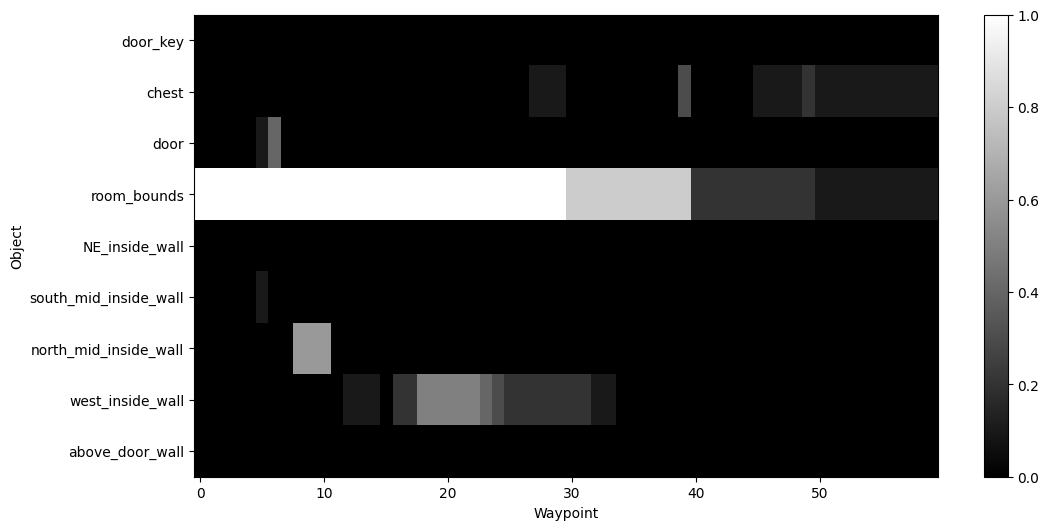

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))
plt.imshow(inside_objects_average, aspect='auto', cmap='gray', interpolation='nearest', vmin=0, vmax=1)
plt.colorbar();
plt.xlabel('Waypoint')
plt.ylabel('Object')
# add object names to y-axis
plt.yticks(range(n_objects), [obj for obj in scenario.objects]);
